In [2]:
import numpy as np
from pyomo.environ import *

# Step 1 - DC load flow using PTDF in Python

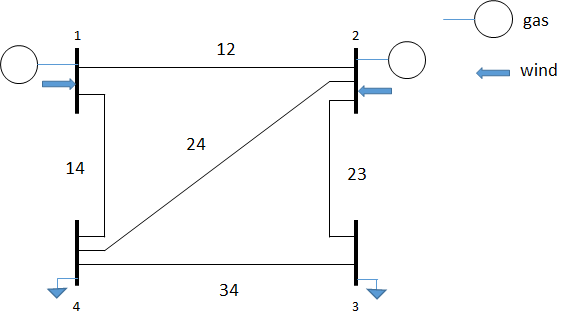

In [3]:
from IPython.display import Image
Image(filename="C:/Users/fmansoor/Downloads/4bus/4bus_grid.png",width=500,height=500)

In [4]:
M=np.array([[0.4,0,0.3,0.35],[0.6,0,-0.3,-0.35],[-0.2,0,-0.4,-0.3],[-0.4,0,-0.3,-0.35]
            ,[-0.2,0,0.6,-0.3]])
print(M)

[[ 0.4   0.    0.3   0.35]
 [ 0.6   0.   -0.3  -0.35]
 [-0.2   0.   -0.4  -0.3 ]
 [-0.4   0.   -0.3  -0.35]
 [-0.2   0.    0.6  -0.3 ]]


In [5]:
f_old = np.array([20,180,200,240,-20])
print(f_old)

[ 20 180 200 240 -20]


In [6]:
dP = np.array([-50,0,0,30])
print(dP)

[-50   0   0  30]


In [7]:
df=M*dP
print(df)

[[-20.    0.    0.   10.5]
 [-30.    0.   -0.  -10.5]
 [ 10.    0.   -0.   -9. ]
 [ 20.    0.   -0.  -10.5]
 [ 10.    0.    0.   -9. ]]


In [48]:
f_new = (M*dP).sum(axis=1) + f_old
print(f_new)

[ 10.5 139.5 201.  249.5 -19. ]


# Step 2 - Optimization with Python

In [9]:
model = ConcreteModel()

In [12]:
c = np.array([100,100]) #cost of generation
P_old = np.array([200,400]) #old generation at generation buses
Load = np.array([380,220]) #load 
P_max = np.array([500,500]) #max. generation at bus
f_max = np.array([250,250,250,250,250]) #line thermal limit

In [14]:
model.P_new = Var(index) #new generation at generation bus

In [13]:
index = range(2)
print(index)

range(0, 2)


In [18]:
P = model.P_new + P_old #total generation after optimization

In [21]:
def obj_rule(model):
    return sum(c[i]*P[i] for i in index)
model.z = Objective(rule=obj_rule,sense=minimize)

In [33]:
def max_gen_rule(model,i):
    return model.P_new[i] + P_old[i] <= P_max[i]
model.Gen_const1 = Constraint(index,rule=max_gen_rule)

In [45]:
def load_rule(model):
    return sum(model.P_new[i] for i in index)+sum(P_old) == sum(Load)
model.load_const5 = Constraint(rule=load_rule)

In [52]:
dP11 = P_old - model.P_new

In [55]:
def line_rule(model,i):
    return (-f_max[i], (M*dP11[i]).sum(axis=1) + f_old ,f_max[i])
model.Line_const1 = Constraint(index,rule=line_rule)

In [47]:
f_max[2]

250